# Boba Maps of NYC

In [556]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [557]:
df = pd.read_csv('boba-nyc.csv')
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['delivery', 'pickup']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['delivery', 'pickup']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['delivery', 'pickup']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['delivery', 'pickup']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['delivery', 'pickup']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)


In [558]:
df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,397.000000,397.000000,3.500000e+02,397.000000,397.000000,397.000000
mean,91.947103,3.989924,1.610915e+10,8842.775539,40.716455,-73.943691
std,117.369828,0.588097,2.396727e+09,5531.159717,0.058249,0.081600
min,1.000000,1.000000,1.201432e+10,953.875131,40.537609,-74.166080
25%,20.000000,3.500000,1.347731e+10,4040.343973,40.689812,-73.994710
50%,52.000000,4.000000,1.718275e+10,8210.929458,40.732567,-73.973940
75%,117.000000,4.500000,1.718887e+10,12579.578944,40.757323,-73.883093
max,739.000000,5.000000,1.934235e+10,25132.157979,40.886959,-73.702410


In [559]:
df.describe(include=['O']).T

,count,unique,top,freq
id,397,397,Q3fmTHT7zilDWtfzLK9lMA,1
alias,397,397,truedan-new-york-3,1
name,397,259,Kung Fu Tea,26
image_url,392,392,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,1
url,397,397,https://www.yelp.com/biz/truedan-new-york-3?ad...,1
categories,397,172,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",110
coordinates,397,391,"{'latitude': 40.60413, 'longitude': -73.99715}",2
transactions,397,5,"['delivery', 'pickup']",171
price,254,3,$,170
location,397,394,"{'address1': '90-15 Queens Blvd', 'address2': ...",2


## Map boba data for NYC neighborhoods

In [560]:
# read neighborhood data as geodataframe
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
neighborhoods = gpd.read_file(url)
neighborhoods.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [561]:
# re-project neighborhood data
neighborhoods = neighborhoods.to_crs('EPSG:4326')

# open the boba dataframe as geo data frame using the lat-long info in the data
gdf = gpd.GeoDataFrame(df, crs=neighborhoods.crs, geometry=gpd.points_from_xy(df.longitude, df.latitude))

print(neighborhoods.crs)
print(gdf.crs)

EPSG:4326
EPSG:4326


/Users/ho/opt/anaconda3/envs/pyv37/lib/python3.7/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


In [562]:
# join the neighborhood information to each boba shop
join_df = gpd.sjoin(gdf, neighborhoods, how="left")
print(join_df.shape)
join_df.head()

(397, 27)


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,longitude,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,-73.996220,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}",...,-73.987750,POINT (-73.98775 40.72880),139,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}",...,-73.984539,POINT (-73.98454 40.72060),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}",...,-73.989191,POINT (-73.98919 40.73552),32,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891148
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}",...,-73.997100,POINT (-73.99710 40.71617),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332


In [563]:
# get the counts of boba shops groupped by neighborhood names
nt_count = join_df.groupby(by='ntaname')['id'].count().sort_values(ascending=True)
nt_count = nt_count.reset_index()
nt_count.columns = ['ntaname', 'counts']
nt_count.describe()

,counts
count,94.000000
mean,4.223404
std,5.993104
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,39.000000


In [564]:
# get the average ratings of boba shops groupped by neighborhood names
nt_rating = join_df.groupby(by='ntaname')['rating'].mean().sort_values(ascending=True)
nt_rating = nt_rating.reset_index()
nt_rating.columns = ['ntaname','rating']
nt_rating.describe()

,rating
count,94.000000
mean,4.018316
std,0.473810
min,2.000000
25%,3.858766
50%,4.000000
75%,4.276786
max,5.000000


In [565]:
# get the average ratings of boba shops groupped by neighborhood names
nt_revcount = join_df.groupby(by='ntaname')['review_count'].sum().sort_values(ascending=True)
nt_revcount = nt_revcount.reset_index()
nt_revcount.columns = ['ntaname','review_count']
nt_revcount.describe()

,review_count
count,94.000000
mean,388.329787
std,785.952602
min,1.000000
25%,32.500000
50%,102.500000
75%,360.500000
max,4969.000000


In [566]:
# merge the counts, ratings, review counts by neighborhood dataframe to the neighborhood geodataframe, which contains spatial information of the neighborhoods
group_nt_gdf = neighborhoods.merge(nt_count, how="left", left_on='ntaname', right_on='ntaname')
group_nt_gdf = group_nt_gdf.merge(nt_rating, how="left", left_on='ntaname', right_on='ntaname')
group_nt_gdf = group_nt_gdf.merge(nt_revcount, how="left", left_on='ntaname', right_on='ntaname')

group_nt_gdf.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,rating,review_count
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",4.0,4.50000,49.0
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",NaN,NaN,NaN
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",5.0,4.00000,329.0
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",16.0,3.90625,2475.0
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",NaN,NaN,NaN


In [567]:
# get the lat-long of the centroid of each neighborhood ("label_geometry") for labeling
group_nt_gdf['label_geometry'] = group_nt_gdf['geometry'].centroid
group_nt_gdf.sort_values('counts', ascending=True)
group_nt_gdf.head()

/Users/ho/opt/anaconda3/envs/pyv37/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,rating,review_count,label_geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",4.0,4.50000,49.0,POINT (-73.80955 40.76835)
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",NaN,NaN,NaN,POINT (-73.86840 40.76335)
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",5.0,4.00000,329.0,POINT (-73.78372 40.73489)
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",16.0,3.90625,2475.0,POINT (-73.98350 40.75573)
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",NaN,NaN,NaN,POINT (-73.85619 40.81805)


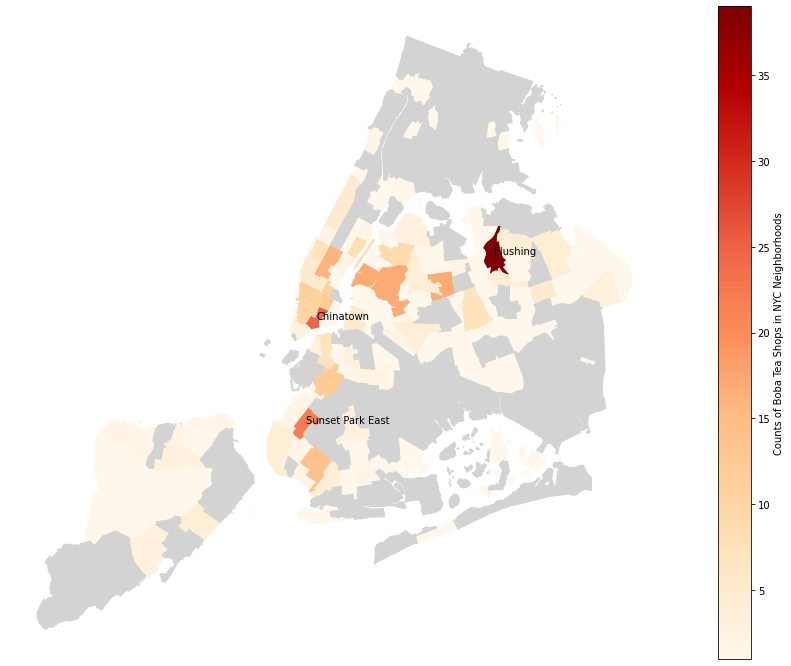

In [568]:
# create a choropleth map of boba shop counts in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12))
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(ax=ax, column='counts', cmap='OrRd', edgecolor="none", linewidth=1, legend=True, legend_kwds = {'label': "Counts of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

# lebel the top 3 neighborhoods
top_counts = group_nt_gdf.sort_values("counts", ascending=False)[0:3]
for x, y, label in zip(top_counts.label_geometry.x, top_counts.label_geometry.y, top_counts.ntaname):
    ax.annotate(label, xy=(x, y))

ax.set_axis_off()

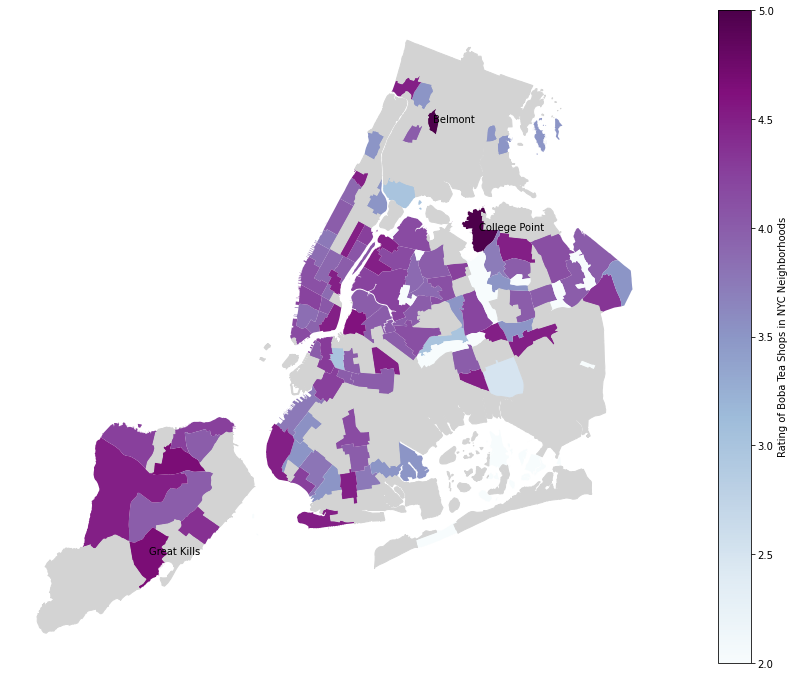

In [569]:
# create a choropleth map of average boba shop ratings in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12))
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(
    ax=ax, column='rating', cmap='BuPu', edgecolor="none", linewidth=1, legend=True,
    legend_kwds = {'label': "Rating of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

# lebel the top 3 neighborhoods
top_rated = group_nt_gdf.sort_values("rating", ascending=False)[0:3]
for x, y, label in zip(top_rated.label_geometry.x, top_rated.label_geometry.y, top_rated.ntaname):
    ax.annotate(label, xy=(x, y))
ax.set_axis_off()

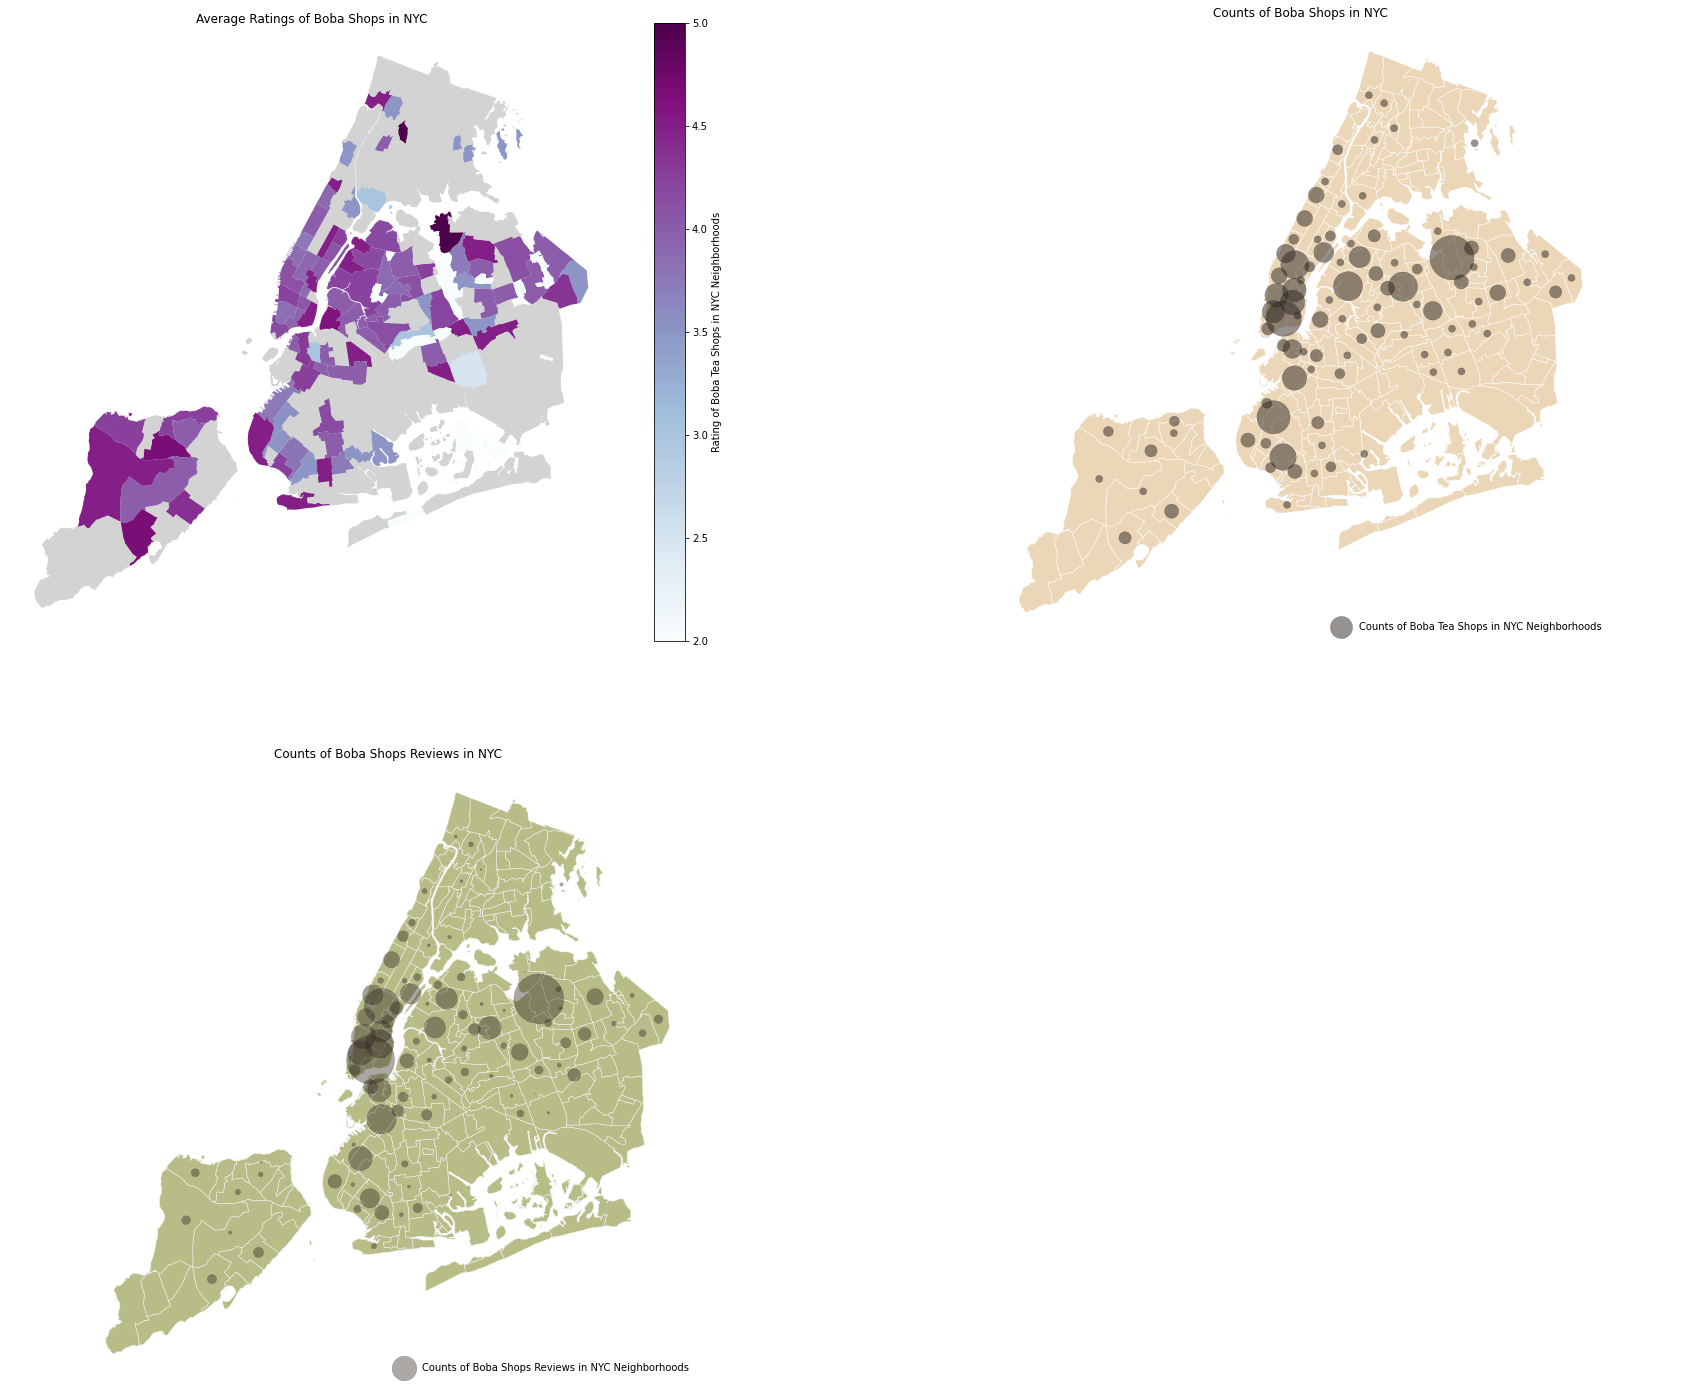

In [570]:
# Put the maps side to side..
# create a choropleth map of boba shop ratings in NYC neighborhoods
# and proportional symbol maps of boba shop counts and boba shop review counts in NYC neighborhoods

fig, ax = plt.subplots(2, 2, figsize=(30, 25))


# draw average rating of boba tea shops
ax[0][0].title.set_text('Average Ratings of Boba Shops in NYC')
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(
    ax=ax[0][0], column='rating', cmap='BuPu', edgecolor="none", linewidth=1, legend=True,
    legend_kwds = {'label': "Rating of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)


# To create proportional symbol maps,
# create a copy of the geodataframe using the centroids coordinate as the geometry
group_nt_gdf_pt = group_nt_gdf.copy()
group_nt_gdf_pt['geometry'] = group_nt_gdf_pt['label_geometry']
group_nt_gdf_pt.head()


# draw counts of boba tea shops
ax[0][1].title.set_text('Counts of Boba Shops in NYC')
neighborhoods.plot(ax=ax[0][1], color="#ebd7b8", edgecolor="white",linewidth=0.5, alpha=1)
group_nt_gdf_pt.plot(
    ax=ax[0][1], color="#2e2622", markersize=group_nt_gdf_pt.counts * 50, alpha=0.5, edgecolor='#2e2622', linewidth=0.4, legend=True, label="Counts of Boba Tea Shops in NYC Neighborhoods")


# draw counts of reviews
ax[1][0].title.set_text('Counts of Boba Shops Reviews in NYC')
neighborhoods.plot(ax=ax[1][0], color="#b8bd88", edgecolor="whitesmoke",linewidth=0.5, alpha=1)
group_nt_gdf_pt.plot(
    ax=ax[1][0], color="#2e2622", markersize=group_nt_gdf_pt.review_count / 2, alpha=0.4, edgecolor='#2e2622', linewidth=0.4, legend=True, label="Counts of Boba Shops Reviews in NYC Neighborhoods")

ax[0][0].set_axis_off()
ax[0][1].set_axis_off()
ax[1][0].set_axis_off()
ax[1][1].set_axis_off()

ax[0][1].legend(loc='lower right', markerscale=0.7, frameon=False)
ax[1][0].legend(loc='lower right', markerscale=0.7, frameon=False)

### The top-rated neighborhoods seem to have low counts of boba shops and count of reviews.

- fewer boba shops...less competition?
- fewer counts of review...less representative rating?

In [571]:
group_nt_gdf[['rating', 'counts', 'review_count']].describe()

,rating,counts,review_count
count,94.000000,94.000000,94.000000
mean,4.018316,4.223404,388.329787
std,0.473810,5.993104,785.952602
min,2.000000,1.000000,1.000000
25%,3.858766,1.000000,32.500000
50%,4.000000,2.000000,102.500000
75%,4.276786,4.000000,360.500000
max,5.000000,39.000000,4969.000000


In [572]:
group_nt_gdf.sort_values("rating", ascending=False).dropna()[0:10]

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,rating,review_count,label_geometry
64,2.0,Bronx,005,BX06,Belmont,1.355635e+07,17104.422131,"POLYGON ((-73.88309 40.86660, -73.88298 40.866...",1.0,5.000000,5.0,POINT (-73.88587 40.85778)
103,4.0,Queens,081,QN23,College Point,5.055398e+07,59454.750110,"MULTIPOLYGON (((-73.86788 40.78736, -73.86803 ...",1.0,5.000000,2.0,POINT (-73.84281 40.78092)
160,5.0,Staten Island,085,SI54,Great Kills,8.961114e+07,66104.656119,"POLYGON ((-74.14439 40.56971, -74.14287 40.569...",3.0,4.666667,171.0,POINT (-74.15089 40.55186)
122,5.0,Staten Island,085,SI07,Westerleigh,6.325658e+07,41655.704816,"POLYGON ((-74.13047 40.63089, -74.13014 40.629...",3.0,4.666667,58.0,POINT (-74.12535 40.61688)
145,3.0,Brooklyn,047,BK73,North Side-South Side,2.886227e+07,28155.614043,"POLYGON ((-73.95814 40.72440, -73.95772 40.724...",5.0,4.600000,410.0,POINT (-73.95862 40.71492)
115,3.0,Brooklyn,047,BK31,Bay Ridge,6.722711e+07,44551.671761,"POLYGON ((-74.03230 40.64358, -74.02983 40.642...",4.0,4.500000,371.0,POINT (-74.02989 40.62485)
63,3.0,Brooklyn,047,BK35,Stuyvesant Heights,3.140694e+07,28239.081099,"POLYGON ((-73.91805 40.68721, -73.91800 40.686...",1.0,4.500000,51.0,POINT (-73.93189 40.68817)
81,4.0,Queens,081,QN71,Old Astoria,1.562046e+07,19367.656081,"POLYGON ((-73.92828 40.77690, -73.92785 40.776...",1.0,4.500000,123.0,POINT (-73.92833 40.77157)
59,4.0,Queens,081,QN61,Jamaica,4.730804e+07,43696.365169,"POLYGON ((-73.76845 40.70964, -73.76919 40.709...",1.0,4.500000,325.0,POINT (-73.79398 40.70437)
97,1.0,Manhattan,061,MN28,Lower East Side,2.329937e+07,26518.511656,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",1.0,4.500000,6.0,POINT (-73.98091 40.71784)


## NYC Neighborhood Boba Index

### - that take into account counts of reviews and counts of boba shops in the neighborhood?

In [573]:
# make a copy of the boba dataframe
join_df2 = join_df.copy()

In [574]:
# make a copy of the neighborhoods geodataframe 
group_nt_gdf2 = group_nt_gdf[['boro_name', 'ntaname', 'geometry', 'label_geometry']].copy()
group_nt_gdf2.head()

,boro_name,ntaname,geometry,label_geometry
0,Queens,Murray Hill,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",POINT (-73.80955 40.76835)
1,Queens,East Elmhurst,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",POINT (-73.86840 40.76335)
2,Queens,Fresh Meadows-Utopia,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",POINT (-73.78372 40.73489)
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573)
4,Bronx,Soundview-Castle Hill-Clason Point-Harding Park,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",POINT (-73.85619 40.81805)


In [575]:
join_df2['rate_rev'] = join_df2['rating'] * join_df2['review_count']
join_df2.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,rate_rev
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,96,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527,432.0
1,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media3.fl.yelpcdn.com/bphoto/RzKMKS...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,58,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}",...,POINT (-73.98775 40.72880),139,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094,261.0
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,28,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}",...,POINT (-73.98454 40.72060),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332,126.0
3,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,54,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}",...,POINT (-73.98919 40.73552),32,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891148,216.0
4,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,83,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}",...,POINT (-73.99710 40.71617),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332,373.5


In [576]:
# sum up the (rating * review_count) by neighborhood
nt_raterev2 = join_df2.groupby(by='ntaname')['rate_rev'].sum().sort_values(ascending=True)
nt_raterev2 = nt_raterev2.reset_index()
nt_raterev2.columns = ['ntaname','rate_rev']
nt_raterev2.head()

,ntaname,rate_rev
0,park-cemetery-etc-Queens,2.0
1,Fort Greene,6.0
2,College Point,10.0
3,Belmont,25.0
4,Lower East Side,27.0


In [577]:
# merge to the neighborhood geodataframe
group_nt_gdf2 = group_nt_gdf2.merge(nt_count, how='left', left_on='ntaname', right_on='ntaname')
group_nt_gdf2 = group_nt_gdf2.merge(nt_rating, how='left', left_on='ntaname', right_on='ntaname')
group_nt_gdf2 = group_nt_gdf2.merge(nt_revcount, how='left', left_on='ntaname', right_on='ntaname')

group_nt_gdf2 = group_nt_gdf2.merge(nt_raterev2, how='left', left_on='ntaname', right_on='ntaname')

group_nt_gdf2.head()

,boro_name,ntaname,geometry,label_geometry,counts,rating,review_count,rate_rev
0,Queens,Murray Hill,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",POINT (-73.80955 40.76835),4.0,4.50000,49.0,218.0
1,Queens,East Elmhurst,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",POINT (-73.86840 40.76335),NaN,NaN,NaN,NaN
2,Queens,Fresh Meadows-Utopia,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",POINT (-73.78372 40.73489),5.0,4.00000,329.0,1194.5
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573),16.0,3.90625,2475.0,9239.5
4,Bronx,Soundview-Castle Hill-Clason Point-Harding Park,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",POINT (-73.85619 40.81805),NaN,NaN,NaN,NaN


### The creation of Boba Index...

In [578]:
group_nt_gdf2['boba_index'] = (

    # review counts-weighted rating...
    group_nt_gdf2['rate_rev']                        # sum of (rating * review counts) in neighborhood
    / group_nt_gdf2['review_count']                  # / (the total review counts in neighborhood)

    # consider competition...
    * np.sqrt(group_nt_gdf2['counts'])               # * (square root of total boba shop count in neighborhood)
    / (np.sqrt(group_nt_gdf2['counts'])).mean()      # / (mean of square root boba shop count in whole NYC)

)

group_nt_gdf2.head()

,boro_name,ntaname,geometry,label_geometry,counts,rating,review_count,rate_rev,boba_index
0,Queens,Murray Hill,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",POINT (-73.80955 40.76835),4.0,4.50000,49.0,218.0,5.043640
1,Queens,East Elmhurst,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",POINT (-73.86840 40.76335),NaN,NaN,NaN,NaN,NaN
2,Queens,Fresh Meadows-Utopia,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",POINT (-73.78372 40.73489),5.0,4.00000,329.0,1194.5,4.601813
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573),16.0,3.90625,2475.0,9239.5,8.464220
4,Bronx,Soundview-Castle Hill-Clason Point-Harding Park,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",POINT (-73.85619 40.81805),NaN,NaN,NaN,NaN,NaN


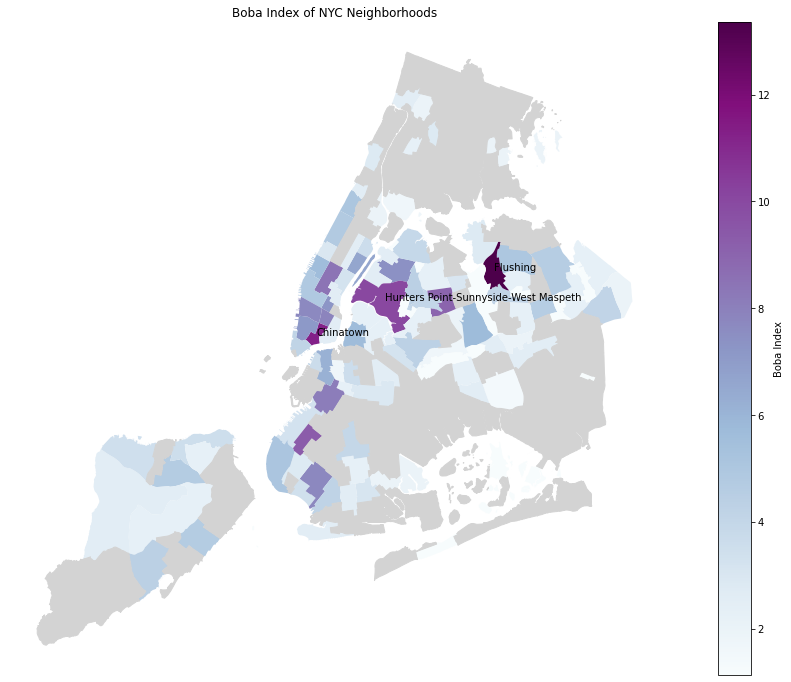

In [579]:
# create a choropleth map of Baba Index in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12), sharey=False)

ax.title.set_text('Boba Index of NYC Neighborhoods')
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf2.plot(
    ax=ax, column='boba_index', cmap='BuPu', edgecolor="none", linewidth=1, legend=True,
    legend_kwds = {'label': "Boba Index"}, missing_kwds=missing_kwds)

top_rated = group_nt_gdf2.sort_values("boba_index", ascending=False)[0:3]
for x, y, label in zip(top_rated.label_geometry.x, top_rated.label_geometry.y, top_rated.ntaname):
    ax.annotate(label, xy=(x, y))

ax.set_axis_off()

In [580]:
group_nt_gdf2.sort_values("boba_index", ascending=False).dropna()[0:10]


,boro_name,ntaname,geometry,label_geometry,counts,rating,review_count,rate_rev,boba_index
155,Queens,Flushing,"POLYGON ((-73.82331 40.77958, -73.82355 40.779...",POINT (-73.82887 40.76109),39.0,3.730769,4969.0,18738.5,13.349095
88,Manhattan,Chinatown,"POLYGON ((-73.98382 40.72147, -73.98386 40.721...",POINT (-73.99463 40.71561),25.0,3.940000,4628.0,18395.5,11.265279
166,Queens,Hunters Point-Sunnyside-West Maspeth,"POLYGON ((-73.92563 40.75214, -73.92442 40.752...",POINT (-73.93121 40.73977),17.0,4.235294,889.0,3811.0,10.018792
150,Brooklyn,Sunset Park East,"POLYGON ((-73.98906 40.64412, -73.98978 40.643...",POINT (-74.00465 40.64189),22.0,3.545455,1154.0,4042.0,9.312270
144,Queens,Elmhurst,"POLYGON ((-73.86791 40.74493, -73.86788 40.744...",POINT (-73.87712 40.73949),17.0,4.117647,1033.0,3996.5,9.041858
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573),16.0,3.906250,2475.0,9239.5,8.464220
118,Brooklyn,Park Slope-Gowanus,"POLYGON ((-73.97376 40.68305, -73.97375 40.682...",POINT (-73.98390 40.67123),12.0,4.250000,1730.0,7138.0,8.101674
139,Manhattan,East Village,"POLYGON ((-73.98378 40.72154, -73.98382 40.721...",POINT (-73.98593 40.72762),12.0,4.041667,1602.0,6450.0,7.905722
106,Brooklyn,Bensonhurst West,"POLYGON ((-73.97964 40.61556, -73.98022 40.615...",POINT (-73.99526 40.61222),14.0,3.785714,746.0,2717.5,7.725889
140,Manhattan,West Village,"POLYGON ((-73.98990 40.73443, -73.98987 40.733...",POINT (-74.00155 40.73305),11.0,4.227273,1183.0,4843.0,7.696261


In [581]:
group_nt_gdf2.describe()

,counts,rating,review_count,rate_rev,boba_index
count,94.000000,94.000000,94.000000,94.000000,94.000000
mean,4.223404,4.018316,388.329787,1533.920213,3.967595
std,5.993104,0.473810,785.952602,3049.582823,2.347052
min,1.000000,2.000000,1.000000,2.000000,1.133662
25%,1.000000,3.858766,32.500000,125.250000,2.267325
50%,2.000000,4.000000,102.500000,443.250000,3.052369
75%,4.000000,4.276786,360.500000,1483.500000,4.686944
max,39.000000,5.000000,4969.000000,18738.500000,13.349095
